<a href="https://colab.research.google.com/github/DarekGit/FACES_DNN/blob/master/notebooks/WIDERFACE_Detectron2_DD_mobilenet_v2_test%2BScript_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###[Spis Treści](https://github.com/DarekGit/FACES_DNN/blob/master/notebooks/Praca_Dyplomowa.ipynb)
[7. Eksport modelu](07_00_Eksport_modelu.ipynb)



# Install detectron2

Detectron2  https://github.com/facebookresearch/detectron2 <br>
Detectron2 Beginner's Tutorial https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5 <br>
Documentation https://detectron2.readthedocs.io <br>
Detectron2 Model Zoo and Baselines https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md <br>
Rethinking ImageNet Pre-training https://arxiv.org/pdf/1811.08883.pdf <br>

Wykorzystano kody z <br>
https://github.com/youngwanLEE/vovnet-detectron2

In [1]:
import os
def Wider_load(val=True,train=True,test=False):
  os.makedirs('WIDER/', exist_ok=True)

  if val:
    #!gdown https://drive.google.com/uc?id=0B6eKvaijfFUDd3dIRmpvSk8tLUk
    !gdown https://drive.google.com/uc?id=1-5A_pa_jDS7gk8mHVCBB7ApV5KN8jWDr -O WIDER/tempv.zip
    !unzip -q WIDER/tempv.zip -d WIDER
    !rm WIDER/tempv.zip  

  if train:
    ### WIDER Face Training Images
    #!gdown https://drive.google.com/uc?id=0B6eKvaijfFUDQUUwd21EckhUbWs
    !gdown https://drive.google.com/uc?id=1-1iJfmXKYvAx9uLdRDX5W6HHG_KZv1jH -O WIDER/temptr.zip
    !unzip -q WIDER/temptr.zip -d WIDER
    !rm WIDER/temptr.zip
  
  if test:
    #!gdown https://drive.google.com/uc?id=0B6eKvaijfFUDbW4tdGpaYjgzZkU
    !gdown https://drive.google.com/uc?id=1tTpUJZEQMKDVxKT6100V5FwDuGX_8sDi -O WIDER/tempt.zip
    !unzip -q WIDER/tempt.zip -d WIDER
    !rm WIDER/tempt.zip


  ### Face annotations
  !wget mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip -O WIDER/tempa.zip
  !unzip -q WIDER/tempa.zip -d WIDER
  !rm WIDER/tempa.zip

  #annotations tool
  !gdown https://drive.google.com/uc?id=1_9ydMZlTNFXBOMl16xsU8FSBmK2PW4lN -O WIDER/tools.py

  #zestaw z danymi wyników trenowania
  !gdown https://drive.google.com/uc?id=1Sk6JWWZFHfxvAJtF7JKOk9ptfyVZWNoU -O WIDER/WIDER_test_set.json


  #mAP tools
  !wget -q -O WIDER/mAP.py https://drive.google.com/uc?id=1PtEsobTFah3eiCDbSsYblOGbe2fmkjGR

  ### Examples and formats of the submissions
  #!wget mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/example/Submission_example.zip


In [2]:
def repo_load():
  !pip install cython pyyaml==5.1
  !pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  # install detectron2:
  !git clone https://github.com/facebookresearch/detectron2 detectron2_repo
  !cd detectron2_repo && git reset bd2ea47 --hard # v0.1.3
  !pip install -q -e detectron2_repo

  !gdown https://drive.google.com/uc?id=1U0SVkSaSio4TBiXvF1QfTZI65WYpXpZ9
  !unzip -qo mobilenet.zip
  !rm -f mobilenet.zip

repo_load()

     |████████████████████████████████| 276kB 8.0MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=0002557b8ad06dc1a088629e363c337692e30e89bf80e59b2d30ea7777b5cc2a
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-lyil17by
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-lyil17by
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=266459 sha256=e489e21ae125320bb0de07f20b32131d12c3293094a19a322d8167abaaac869e
  Stored in directory: /tmp/pip-ephem-wheel-cache-b3x0y0hb/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing install

In [3]:
Wider_load(train=False) #Wider_load(train=False) #

Downloading...
From: https://drive.google.com/uc?id=1-5A_pa_jDS7gk8mHVCBB7ApV5KN8jWDr
To: /content/WIDER/tempv.zip
363MB [00:04, 86.9MB/s]
--2020-09-10 19:58:52--  http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip
Resolving mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)... 137.189.99.12
Connecting to mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)|137.189.99.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3591642 (3.4M) [application/zip]
Saving to: ‘WIDER/tempa.zip’

WIDER/tempa.zip     100%[===================>]   3.42M  1.41MB/s    in 2.4s    

2020-09-10 19:58:56 (1.41 MB/s) - ‘WIDER/tempa.zip’ saved [3591642/3591642]

Downloading...
From: https://drive.google.com/uc?id=1_9ydMZlTNFXBOMl16xsU8FSBmK2PW4lN
To: /content/WIDER/tools.py
100% 4.47k/4.47k [00:00<00:00, 3.73MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Sk6JWWZFHfxvAJtF7JKOk9ptfyVZWNoU
To: /content/WIDER/WIDER_test_set.json
100% 14.7k/14.7k [00:00<00:0

In [4]:
#Faces_DD set
!pip install gdown
import gdown
url = 'https://drive.google.com/uc?export=download&id=1XwVm-2EMFdy9Zq39pKFr5UoSJvgTOm-7'
output = 'Faces_DD.zip'
gdown.download(url, output, False)
!unzip -qo Faces_DD.zip
!rm Faces_DD.zip

url = 'https://drive.google.com/uc?export=download&id=1gIIUK518Ft9zi3VDVQZLRVozI-Hkpgt2'
output = 'Faces_DD/Faces_DD_metrics.json'
gdown.download(url, output, False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1XwVm-2EMFdy9Zq39pKFr5UoSJvgTOm-7
To: /content/Faces_DD.zip
2.37GB [00:12, 183MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1gIIUK518Ft9zi3VDVQZLRVozI-Hkpgt2
To: /content/Faces_DD/Faces_DD_metrics.json
100%|██████████| 336k/336k [00:00<00:00, 86.7MB/s]


'Faces_DD/Faces_DD_metrics.json'

<font color=red> Restart runtime to continue... <b>Crtl+M.</b> </font>

In [1]:
!nvidia-smi
from psutil import virtual_memory
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(virtual_memory().total / 1e9))

Thu Sep 10 20:05:19 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    25W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#!gdown https://drive.google.com/uc?id=1Sk6JWWZFHfxvAJtF7JKOk9ptfyVZWNoU -O WIDER/WIDER_test_set.json

In [2]:
import time

import torch, torchvision
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from google.colab import drive
import os
import cv2
import random
import itertools
import shutil
import glob
import json
import numpy as np
import pandas as pd
from PIL import ImageDraw, Image
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import collections as mc

from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
import detectron2.utils.comm as comm
from detectron2.engine import DefaultPredictor, DefaultTrainer, HookBase
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_train_loader
from detectron2.structures import BoxMode
from detectron2.data import build_detection_test_loader
from detectron2.data.datasets import register_coco_instances
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

In [3]:
from mobilenet.utils import  add_mobilenet_config, build_mobilenetv2_fpn_backbone
from WIDER.mAP import mAP, plot_mAP
from WIDER.tools import annotations,output_Files

#sciezki do trenowanych wag modeli mobilenet
with open('WIDER/WIDER_test_set.json','r') as f:
  test_set=json.load(f)


In [4]:
output_files=output_Files()
with open('Faces_DD/Faces_DD_metrics.json','r') as f:
  Faces_DD=json.load(f)
resF,resW ={},{}  # wyniki dla Feces i Wider {gbxs,dbxs,metric}

In [5]:
test_set['BN_Mish_V2_250+F_2_50k'] #best model BN+Mish V2 250k iterations + FrozenBN 50k iterations

{'config': 'BN_Mish_V2F',
 'pth': 'https://drive.google.com/uc?id=1-I6YSAs9NrORI4cFISfK_-4Yhm1twfDi',
 'weights_name': 'model_0049999.pth'}

In [6]:
len(test_set.keys()),test_set.keys()

(96,
 dict_keys(['100k', '400k', '800k', 'BN_10k', 'BN_20k', 'BN_30k', 'BN_40k', 'BN_50k', 'BN_100k', 'BN_120k', 'BN_130k', 'BN_150k', 'BN_200k', 'BN_230k', 'BN_250k', 'BN_300k', 'BN_350k', 'BN_400k', 'BN_410k', 'BN_420k', 'BN_450k', 'BN_500k', 'BN_550k', 'BN_600k', 'BN_650k', 'BN_700k', 'BN_800k', 'BN_V2_10k', 'BN_V2_30k', 'BN_V2_50k', 'BN_V2_100k', 'BN_V2_150k', 'BN_V2_200k', 'BN_V2_250k', 'BN_V2_300k', 'BN_Mish_10k', 'BN_Mish_30k', 'BN_Mish_50k', 'BN_Mish_100k', 'BN_Mish_150k', 'BN_Mish_200k', 'BN_Mish_V2_10k', 'BN_Mish_V2_20k', 'BN_Mish_V2_50k', 'BN_Mish_V2_100k', 'BN_Mish_250k', 'BN_Mish_300k', 'BN_Mish_V2_150k', 'BN_Mish_V2_200k', 'BN_Mish_V2_250k', 'BN_Mish_V2_300k', 'BN_Mish_V3_10k', 'BN_Mish_V3_20k', 'BN_Mish_V2_270k', 'BN_Mish_V2_400k', 'BN_Mish_V3_50k', 'BN_Mish_V3_80k', 'BN_V2_400k', 'BN_Mish_V3_100k', 'BN_Mish_V3_80+_10k', 'BN_Mish_V3_80+_20k', 'BN_Mish_V3_80+_30k', 'BN_Mish_V3_80+_40k', 'BN_V2_500k', 'BN_Mish_V2_250+_10k', 'BN_Mish_V3_80+_50k', 'BN_Mish_V2_250+_20k', 'BN_

800k - trenowanie na parametrach domyslnych do 800k iteracji

BN_800k - z BatchNormalization do 800k

BN_V2_300k - BN + normalizacja w preprocesing + poprawiony format na RGB

BN_Mish  - zmieniona funkcja aktywacji na Mish z ReLU6

BN_Mish + F - douczania ze zmienionym BN na FrozenBN

# Prepare the dataset

## WIDER FACE: A Face Detection Benchmark
http://shuoyang1213.me/WIDERFACE/ <br>

https://arxiv.org/pdf/1511.06523.pdf <br>


In [7]:
from detectron2.data.datasets.coco import convert_to_coco_json

annos={}
train = annotations("train")
if len(train)>0: annos['train']=train

val = annotations('val')
if len(val)>0: annos['val']=val

test = annotations('test') #random.samples(annotations('test'),5000)
if len(test)>0: annos['test']=test


for d in annos.keys():
  DatasetCatalog.register("face_" + d, lambda d=d: annos[d])
  MetadataCatalog.get("face_" + d).set(thing_classes = ['face'])

'''
faces_metadata = MetadataCatalog.get("face_train")
convert_to_coco_json('face_train', "./OUTPUT/face_train_coco_format.json")
'''

'\nfaces_metadata = MetadataCatalog.get("face_train")\nconvert_to_coco_json(\'face_train\', "./OUTPUT/face_train_coco_format.json")\n'

# "Base-RCNN-MobileNet-FPN_v1.yaml"
mobilenet/configs


Użycie modelu

In [8]:
# pelny zestaw kodow, wynikow
# https://drive.google.com/drive/folders/1ApEnn3br2Z2Nt3-0Ve9DKYKMiDkFVpAR?usp=sharing

#zestawy z konfiguracja cfg
cfg_set = {
    'FrozenBN':'https://drive.google.com/uc?id=1rZFzJaR_g7uYuTguTdbUuCQYD4eXLeqw',
    'BN': 'https://drive.google.com/uc?id=1-doXtwe5iZHoqPzKGc2ZZbxj6Ebhxsn4',
    'BN_V2':'https://drive.google.com/uc?id=1wywB8UAaOO5KZx3IS35kV-rLsvJMIse6',
    'BN_Mish':'https://drive.google.com/uc?id=1-axV3KKg8-YiZZ7uDBh_2v181JoC9Nj3',
    'BN_Mish_V2':'https://drive.google.com/uc?id=1WoESx5RYvpapNicpSrmMoNJeE2GVm3zK',
    'BN_Mish_V3':'https://drive.google.com/uc?id=1-Kgd_2AS4EsD_ZPqP7SxkscyDjP-Qhnr',
    'BN_Mish_V2F':'https://drive.google.com/uc?id=1pCwyYCjIoduro2vIKMZi5HhlpaypH0_x',


      }

def test_set_add(config,count,pth,ext=''): #config name or index of cf_set.keys(), count @ .000
  set_list=list(cfg_set.keys())
  if (isinstance(config,str) and not config in set_list) or (isinstance(config,int)) and config >=len(set_list): 
    print('No ',config,' on the list: ', cfg_set.keys())
  else:
    config=list(cfg_set.keys())[config] if isinstance(config,int) else config
    set_choice=config+ext+'_'+str(count)+'k'
    weights='model_{:07}.pth'.format((count*1000)-1)
    test_set[set_choice]={'pth':'https://drive.google.com/uc?id='+pth,
                          'weights_name': weights,
                          'config': config,}
  return set_choice,test_set[set_choice]

In [9]:
#Weights and cfg configuration from training
cfg = get_cfg()
add_mobilenet_config(cfg)

def cfg_write(cfg,cfg_all):
  for key in cfg_all.keys():
    if isinstance(cfg_all[key],dict): cfg_write(cfg[key],cfg_all[key])
    else: cfg[key]=cfg_all[key]
  return cfg

def set_predictor(set_choice,device='cuda'):
    print('PREPARATION: ',set_choice)
    path = test_set[set_choice]['pth']   #sciezka do wag modelu
    out = test_set[set_choice]['weights_name']
    !gdown $path #-O $out #bez, mamy kontrole zgodnosci nazwy pliku 
    path=cfg_set[test_set[set_choice]['config']] #sciezka do konfiguracji
    !gdown -q $path -O 'Base-RCNN-MobileNet-FPN_V1_ALL.json'


    with open('Base-RCNN-MobileNet-FPN_V1_ALL.json','r') as f:
      cfg_all=json.load(f)  
    
    cfg = get_cfg(); add_mobilenet_config(cfg)
    cfg=cfg_write(cfg,cfg_all)
    cfg.MODEL.WEIGHTS = test_set[set_choice]['weights_name']
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
    cfg.MODEL.DEVICE=device

    return DefaultPredictor(cfg),cfg,set_choice


AP metric on val

In [10]:
def plot_marks(img,metric,dbxs=[],figsize=(14,14)): 

  fig, ax = plt.subplots(1,1,figsize=figsize); ax.imshow(img)
  Ms=np.array(metric['marks'])
  color,color_det,lw=('white','red',1)
  for k,dbx in enumerate(metric['marks']):
    annot=str(k)+'  -   '+metric['persons'][k]
    ax.annotate(annot,np.array(dbx[:2])+2,color='k')
    ax.annotate(annot,dbx[:2],color='w')
  if dbxs != []:
    cbox = mc.LineCollection([[[l,t],[r,t],[r,b],[l,b],[l,t]] for l,t,r,b,_ in dbxs], linewidth=lw+1, colors=color_det)
    ax.add_collection(cbox)

  cbox = mc.LineCollection([[[l,t],[r,t],[r,b],[l,b],[l,t]] for l,t,r,b in Ms], linewidth=lw, colors=color)
  ax.add_collection(cbox)
  print(len(metric['marks']),end=',  ')
  print('Annotated Boxes',end=', ')
  print('        '+metric['path'])
  for name in metric['persons']:
    if name !='': print(name,end=',  ')  
  #plt.axis('off')
  plt.show()

In [11]:
def results(d_set,predictor,name='mAP_',ext='---',pres=False):
    start=time.time()
    gbxs=[]; dbxs=[]; dset=d_set
    if 'annotations' in d_set[0].keys():  #zmiana metryki z Wider do Faces, wybrane pola
      dset=[]
      for r in d_set:
        dset.append({'path' : r['file_name'],'marks' : [b['bbox'] for b in r['annotations']],
                     'persons': ['' for b in r['annotations']]})

    Len=len(dset); print(ext,' ',Len,' imgs : 0 +',end='')
    for i,d in enumerate(dset):   #przypisanie listy detetected i ground truth boxes
        im = cv2.imread(d["path"])
        outputs = predictor(im)
        pbxs=outputs['instances'].pred_boxes.tensor.tolist()
        pconfs=outputs['instances'].scores.tolist()
        dbx=[[*(np.array(bx)+0.5).astype('int'),pconfs[i]] for i,bx in enumerate(pbxs)]
        dbxs.append(dbx)
        gbxs.append(d['marks'] if d['marks']!=[0,0,0,0] else [])  #########################

        if not i%100 : print('\r',ext,' ',Len,' imgs : ',i//100*100,' +',end='')
        if not (i+1)%10 : print(' ',(i+1)%100,end='')
        
    total=time.time()-start
    print('\r',name,ext,' - total time {:.2f} s  per img {:.4f} s'.format(total,total/(i+1)))
      
    # IoUs=[.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.0]
    # keys ['All {:.2f}' for x in IoUs] + ['large','medium','small'] for IoUs[0]
    # r_p: 0 - interpolated, 1 - full
    m,d=mAP(gbxs,dbxs,data=True)
    plot_mAP(m,d,['All 0.50','mAP','large','medium','small'],1,name+ext+'  conf>0',file=name+ext)

    if pres:
      for l in [58,233,259,365,388,394,413,424,446,455,483,532,683,709,722,802,809,874,759]:
        if l < Len:
          m=dset[l]
          print('------------------------  idx  ',l,'  gtx/dbxs',len(m['marks']),'/',len(dbxs[l]))
          plot_marks(Image.open(m['path']),m,dbxs[l],figsize=(18,14))  
    
    return {'gbxs':gbxs,'dbxs':dbxs,'metric':dset} 


In [12]:
#['FrozenBN', 'BN', 'BN_V2', 'BN_Mish', 'BN_Mish_V2', 'BN_Mish_V3', 'BN_Mish_V2F'] cfg sets
test_set_add(6,300,'10JXHtaSjBtDt0b0Sa6X4esBSysnBb2v-','_250+F_22')
test_set_add(4,250,'1-NY6ZeI_0YsI6axbBG9kGpcAr-M0S4wT',)  #najlepszy wynik do dalszego douczania
test_set_add(6,50,'1-I6YSAs9NrORI4cFISfK_-4Yhm1twfDi','_250+F_2') # najlepszy wynik douczania


('BN_Mish_V2F_250+F_2_50k',
 {'config': 'BN_Mish_V2F',
  'pth': 'https://drive.google.com/uc?id=1-I6YSAs9NrORI4cFISfK_-4Yhm1twfDi',
  'weights_name': 'model_0049999.pth'})

In [13]:
with open('WIDER_test_set.json','w')as f:
  json.dump(test_set,f)

#wybór zestawów do analizy

In [14]:
for key in test_set.keys():
  if 'F_2' in key: print(key)

BN_Mish_V2_250+F_20k
BN_Mish_V2_250+F_2_10k
BN_Mish_V2_250+F_2_20k
BN_Mish_V2_250+F_2_50k
BN_Mish_V2_250+F_2_100k
BN_Mish_V2_250+F_2_60k
BN_Mish_V2_250+F_2_40k
BN_Mish_V2F_250+F_2_50k
BN_Mish_V2F_250+F_22_300k


In [15]:
set_choices=['BN_Mish_V2_250+F_2_50k',]
for c in set_choices:
  if c in  test_set.keys(): print(c,' is OK, ',end='')
  else: print('\n!!!!!!! ',c,' is not in test_set!, ',end='')

BN_Mish_V2_250+F_2_50k  is OK, 

In [16]:
set_choices[0],test_set[set_choices[0]]

('BN_Mish_V2_250+F_2_50k',
 {'config': 'BN_Mish_V2F',
  'pth': 'https://drive.google.com/uc?id=1-I6YSAs9NrORI4cFISfK_-4Yhm1twfDi',
  'weights_name': 'model_0049999.pth'})

In [17]:
predictor,cfg,ext=set_predictor(set_choices[-1],device='cuda') #normalnie cuda
print(cfg.dump())

PREPARATION:  BN_Mish_V2_250+F_2_50k
Downloading...
From: https://drive.google.com/uc?id=1-I6YSAs9NrORI4cFISfK_-4Yhm1twfDi
To: /content/model_0049999.pth
150MB [00:01, 76.4MB/s]
CUDNN_BENCHMARK: false
DATALOADER:
  ASPECT_RATIO_GROUPING: true
  FILTER_EMPTY_ANNOTATIONS: true
  NUM_WORKERS: 4
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: []
  PROPOSAL_FILES_TRAIN: []
  TEST:
  - face_val
  TRAIN:
  - face_train
  VAL:
  - face_val
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: false
    SIZE:
    - 0.9
    - 0.9
    TYPE: relative_range
  FORMAT: RGB
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN:
  - 640
  - 672
  - 704
  - 736
  - 768
  - 800
  MIN_SIZE_TRAIN_SAMPLING: choice
MODEL:
  ANCHOR_GENERATOR:
    ANGLES:
    - - -90
      - 0
      - 90
    ASPECT_RATIOS:
    - - 0.5
      - 1.0
      - 2.0
    

PREPARATION:  BN_Mish_V2_250+F_2_50k
Downloading...
From: https://drive.google.com/uc?id=1-I6YSAs9NrORI4cFISfK_-4Yhm1twfDi
To: /content/model_0049999.pth
150MB [00:01, 90.2MB/s]
 Detectron2_Faces_DD_mAP_MN2_ BN_Mish_V2_250+F_2_50k  - total time 308.76 s  per img 0.3338 s
All 0.50:   AP: 92.96%   Recall: 93.83%   IoU: 0.5
large   :   AP: 97.28%   Recall: 97.65%   IoU: 0.5
medium  :   AP: 82.15%   Recall: 85.94%   IoU: 0.5
small   :   AP: 60.99%   Recall: 66.96%   IoU: 0.5
mAP     :   AP: 62.65%   Recall: 67.11%   IoU: 0.5 - 0.95


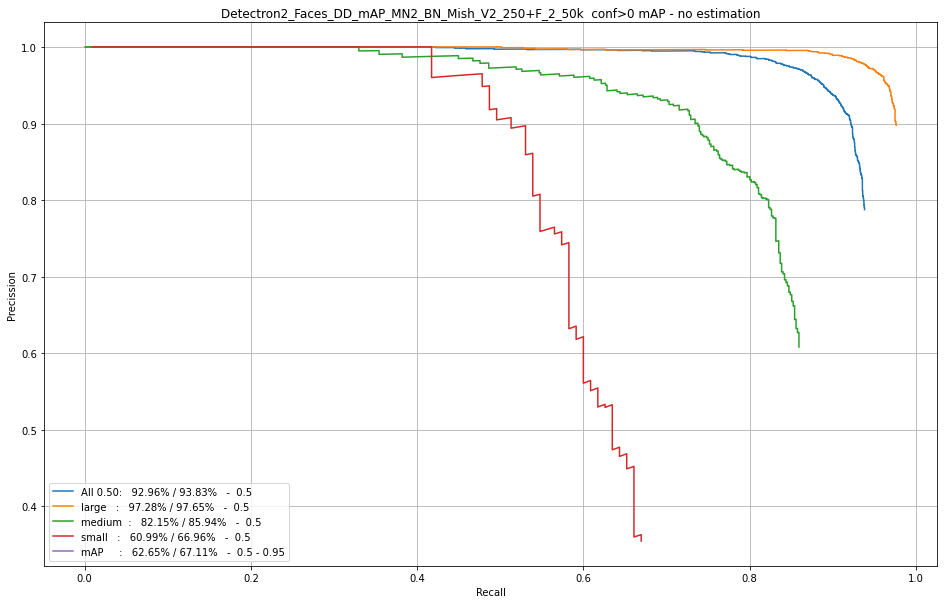

 Detectron2_Wider_Face_mAP_MN2_ BN_Mish_V2_250+F_2_50k  - total time 260.95 s  per img 0.0809 s
All 0.50:   AP: 55.34%   Recall: 56.37%   IoU: 0.5
large   :   AP: 93.72%   Recall: 93.98%   IoU: 0.5
medium  :   AP: 87.79%   Recall: 88.30%   IoU: 0.5
small   :   AP: 41.59%   Recall: 43.11%   IoU: 0.5
mAP     :   AP: 31.21%   Recall: 34.48%   IoU: 0.5 - 0.95


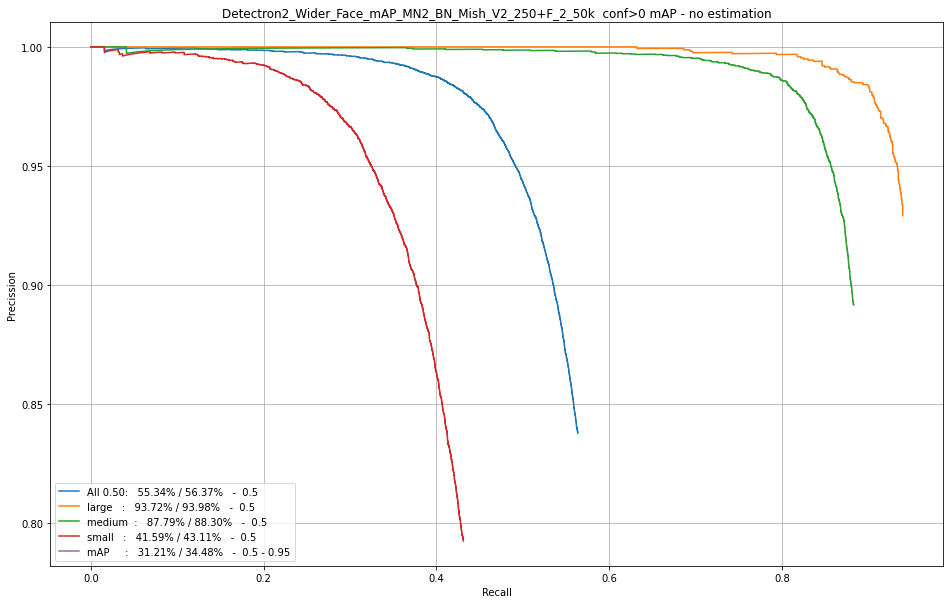

In [19]:
for c in set_choices:
  predictor,cfg,ext =set_predictor(c)
  resF[c]=results(Faces_DD,predictor,'Detectron2_Faces_DD_mAP_MN2_',ext,pres=False)
  resW[c]=results(val,predictor,'Detectron2_Wider_Face_mAP_MN2_',ext,pres=False)

In [20]:
for c in set_choices:
  res=mAP(resW[c]['gbxs'],resW[c]['dbxs'],data=False)
  Ap=[]
  for i in range(10):
    Ap.append(res[0]['All {:.2f}'.format(0.5+i*0.05)][0])
  print(c,' mAP: ',sum(Ap)/10,'\nset: ', Ap)  #srednie AP dla conf [.5 ... 0.95]

BN_Mish_V2_250+F_2_50k  mAP:  0.31210472480941626 
set:  [0.5533726172102698, 0.5369009930980416, 0.5076628388738252, 0.4678914398320625, 0.4103734218519248, 0.3244899306901903, 0.21335836606289532, 0.09148999973203749, 0.015161311287993733, 0.0003463294549220307]


In [21]:
resF[set_choices[0]]['metric'][0]

{'depth': 3,
 'grey': False,
 'marks': [[488.0, 658.0, 1414.0, 1778.0]],
 'mean_std': [[120.13626572107435, 108.362532642924, 99.86483683920541],
  [69.45270481118739, 68.85858604223439, 72.785191769202]],
 'ori_size': [1944, 2592],
 'path': 'Faces_DD/2004/DSC04759.JPG',
 'persons': ['ZBD']}

In [22]:
import json
def to_int(data):
  if isinstance(data,dict):
    for key in data.keys(): data[key]=to_int(data[key])
  if isinstance(data,list):
    for k in range(len(data)): data[k]=to_int(data[k])
  if isinstance(data,tuple):
    data=list(data)
    for k in range(len(data)): data[k]=to_int(data[k]) 
  if 'int' in data.__class__.__name__: 
    data=int(data)
  return data

#json obsluguje calkowite tylko w typie int

iresF = to_int(resF)
iresW = to_int(resW)
with open('Results Detectron2_mobilenetV2_Faces.json','w') as f:
  json.dump(iresF,f)
with open('Results Detectron2_mobilenetV2_Wider.json','w') as f:
  json.dump(iresW,f)

In [ ]:
for c in list(iresF.keys())[:1]:
  
  _,d,ms=iresF[c].values(); num=len(ms) #d dbxs, ms metrics
  for l in [58,233,259,365,388,394,413,424,446,455,483,532,683,709,722,802,809,874,759]:
    if l < num:
      m=ms[l]
      print('------------------------  idx  ',l,'  gtx/dbxs',len(m['marks']),'/',len(d[l]))
      plot_marks(Image.open(m['path']),m,d[l],figsize=(16,12)) 


In [ ]:
for c in list(iresW.keys())[-1:]:

  _,d,ms=iresW[c].values(); num=len(ms) #d dbxs, ms metrics
  for l in [58,233,259,365,388,394,413,424,446,455,483,532,683,709,722,802,809,874,759]:
    if l < num:
      m=ms[l]
      print('------------------------  idx  ',l,'  gtx/dbxs',len(m['marks']),'/',len(d[l]))
      plot_marks(Image.open(m['path']),m,d[l],figsize=(16,12)) 


In [24]:
!zip -u PNG D*.png

	zip warning: PNG.zip not found or empty
  adding: Detectron2_Faces_DD_mAP_MN2_BN_Mish_V2_250+F_2_50k.png (deflated 13%)
  adding: Detectron2_Wider_Face_mAP_MN2_BN_Mish_V2_250+F_2_50k.png (deflated 11%)


#Evaluation

In [32]:
cfg.OUTPUT_DIR='./OUTPUT'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.05   # set the testing threshold for this model
cfg.DATASETS.TEST = ("face_val", )
cfg.DATASETS.VAL = ("face_val", ) 
cfg.DATASETS.TRAIN = ("face_val", ) 
trainer =DefaultTrainer(cfg)
trainer.resume_or_load(resume=True)
cfg.MODEL.WEIGHTS

[09/10 20:27:21 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(24, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(32, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(96, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(320, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): MobileNetV2(
      (features): ModuleList(
        (0): Sequential(
          (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): FrozenBatchNorm2d(num_features=32, eps=1e-05)
          (2)

'model_0049999.pth'

In [33]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader


evaluator = COCOEvaluator("face_val", cfg, False, output_dir="./OUTPUT/")

val_loader = build_detection_test_loader(cfg, "face_val")

inference_on_dataset(trainer.model, val_loader, evaluator)


WARNING [09/10 20:29:19 d2.evaluation.coco_evaluation]: json_file was not found in MetaDataCatalog for 'face_val'. Trying to convert it to COCO format ...
[09/10 20:29:19 d2.data.datasets.coco]: Converting annotations of dataset 'face_val' to COCO format ...)
[09/10 20:29:19 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[09/10 20:29:25 d2.data.datasets.coco]: Conversion finished, #images: 3226, #annotations: 39708
[09/10 20:29:25 d2.data.datasets.coco]: Caching COCO format annotations at './OUTPUT/face_val_coco_format.json' ...
[09/10 20:29:27 d2.data.common]: Serializing 3226 elements to byte tensors and concatenating them all ...
[09/10 20:29:27 d2.data.common]: Serialized dataset takes 3.16 MiB
[09/10 20:29:27 d2.evaluation.evaluator]: Start inference on 3226 images
[09/10 20:29:28 d2.evaluation.evaluator]: Inference done 11/3226. 0.0341 s / img. ETA=0:01:54
[09/10 20:29:33 d2.evaluation.evaluator]: Inference done 157/3226. 0.0326 s / img. ETA=0:01:45
[09/10 20:2

OrderedDict([('bbox',
              {'AP': 31.428475002206994,
               'AP50': 58.286207444504576,
               'AP75': 31.420712999928952,
               'APl': 64.59806451999152,
               'APm': 56.466341971747916,
               'APs': 20.60562553845486})])

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader


evaluator = COCOEvaluator("face_train", cfg, False, output_dir="./OUTPUT/")

val_loader = build_detection_test_loader(cfg, "face_train")

inference_on_dataset(trainer.model, val_loader, evaluator)


WARNING [06/09 14:55:45 d2.evaluation.coco_evaluation]: json_file was not found in MetaDataCatalog for 'face_train'. Trying to convert it to COCO format ...
[06/09 14:55:45 d2.data.datasets.coco]: Converting annotations of dataset 'face_train' to COCO format ...)
[06/09 14:55:45 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[06/09 14:56:19 d2.data.datasets.coco]: Conversion finished, #images: 12880, #annotations: 159424
[06/09 14:56:19 d2.data.datasets.coco]: Caching COCO format annotations at './OUTPUT/face_train_coco_format.json' ...
[06/09 14:56:26 d2.data.common]: Serializing 12880 elements to byte tensors and concatenating them all ...
[06/09 14:56:26 d2.data.common]: Serialized dataset takes 12.74 MiB
[06/09 14:56:26 d2.evaluation.evaluator]: Start inference on 12880 images
[06/09 14:56:27 d2.evaluation.evaluator]: Inference done 11/12880. 0.0502 s / img. ETA=0:11:00
[06/09 14:56:32 d2.evaluation.evaluator]: Inference done 105/12880. 0.0519 s / img. ETA=0:11:2

OrderedDict([('bbox',
              {'AP': 34.34056585711527,
               'AP50': 61.62226254112261,
               'AP75': 35.48098384460268,
               'APl': 69.9191467360881,
               'APm': 60.75444731162003,
               'APs': 23.531161076590415})])

#Eval BN_Mish_V2_250+F_2_100k

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader


evaluator = COCOEvaluator("face_val", cfg, False, output_dir="./OUTPUT/")
val_loader = build_detection_test_loader(cfg, "face_val")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [06/09 13:31:35 d2.evaluation.coco_evaluation]: json_file was not found in MetaDataCatalog for 'face_val'. Trying to convert it to COCO format ...
WARNING [06/09 13:31:35 d2.data.datasets.coco]: Using previously cached COCO format annotations at './OUTPUT/face_val_coco_format.json'. You need to clear the cache file if your dataset has been modified.
[06/09 13:31:35 d2.data.common]: Serializing 3226 elements to byte tensors and concatenating them all ...
[06/09 13:31:35 d2.data.common]: Serialized dataset takes 3.16 MiB
[06/09 13:31:35 d2.evaluation.evaluator]: Start inference on 3226 images
[06/09 13:31:36 d2.evaluation.evaluator]: Inference done 11/3226. 0.0518 s / img. ETA=0:02:50
[06/09 13:31:41 d2.evaluation.evaluator]: Inference done 106/3226. 0.0513 s / img. ETA=0:02:45
[06/09 13:31:46 d2.evaluation.evaluator]: Inference done 201/3226. 0.0514 s / img. ETA=0:02:40
[06/09 13:31:51 d2.evaluation.evaluator]: Inference done 294/3226. 0.0518 s / img. ETA=0:02:36
[06/09 13:31:56

OrderedDict([('bbox',
              {'AP': 31.93090232138276,
               'AP50': 58.538810492956806,
               'AP75': 31.987857560560705,
               'APl': 64.9068460579368,
               'APm': 57.24235410071088,
               'APs': 21.160769566260267})])

#test Script modelu

In [34]:
import time
import torch
import json
import numpy as np
from PIL import Image
from WIDER.mAP import mAP, plot_mAP
from WIDER.tools import annotations,output_Files

In [35]:
train = annotations("val")
val = annotations('val')
with open('Faces_DD/Faces_DD_metrics.json','r') as f:
  Faces_DD=json.load(f)
resF,resW ={},{}  # wyniki dla Feces i Wider {gbxs,dbxs,metric}


In [36]:
#zaladuj model, wejscie o stalym rozmiarze ([image BGR<3,800,1216>,],[[h,w,skala],]) (h,w) okno do odczytu,skala do odtworzenia oryginalu
!wget -q -O model.ts https://drive.google.com/uc?id=107Ym7yjAQlA6FhzAQvHoPITZnsm8Z5Co
model=torch.jit.load('model.ts')

In [37]:
#keep aspect to match size(800,1216) of model
def to_inputs(img):
  #zmian rozmiaru, aby najwiekszy wymiar pokrywal sie z jednym rozmiarow wejsciowych modelu (800,1216) 
  scale=1216/img.size[0]
  size=(int(img.size[1]*scale),1216)
  if size[0]>800:
    scale=800/size[0]
    size=(800,int(size[1]*scale))

  scale=size[1]/img.size[0]
  img_arg=torch.tensor([*size,scale]) #argumenty do wejscia
  img=img.resize((size[1],size[0])).crop((0,0,1216,800))
  imgs=torch.tensor(np.array(img)[:,:,::-1].copy()).permute(2,0,1).expand(1,3,800,1216).cuda() #BGR 3,800,1216
  return (imgs,img_arg.expand(1,3).cuda())

In [38]:
def script_results(d_set,model,name='mAP_',ext='ScriptModel',pres=False):
    start=time.time()
    gbxs=[]; dbxs=[]; dset=d_set
    if 'annotations' in d_set[0].keys():  #zmiana metryki z Wider do Faces, wybrane pola
      dset=[]
      for r in d_set:
        dset.append({'path' : r['file_name'],'marks' : [b['bbox'] for b in r['annotations']],
                     'persons': ['' for b in r['annotations']]})

    Len=len(dset); print(ext,' ',Len,' imgs : 0 +',end='')
    if 'Script' in model.__class__.__name__:
      for i,d in enumerate(dset):   #przypisanie listy detetected i ground truth boxes
        img = Image.open(d["path"])
        inputs=to_inputs(img)
        _,_,s = inputs[1][0].cpu() #skala
        outputs=model(inputs)
        pbxs=outputs[0].cpu()
        pconfs=outputs[1].cpu()
        dbx=[[*(np.array(bx)+0.5).astype('int'),pconfs[i]] for i,bx in enumerate(pbxs)]
        dbxs.append(dbx)
        gbxs.append([[int(x*s+0.5) for x in bx] for bx in d['marks']]) #przeskalowanie anotacji

        if not i%100 : print('\r',ext,' ',Len,' imgs : ',i//100*100,' +',end='')
        if not (i+1)%10 : print(' ',(i+1)%100,end='')
        
    total=time.time()-start
    print('\r',name,ext,' - total time {:.2f} s  per img {:.4f} s'.format(total,total/(i+1)))
      
    # IoUs=[.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.0]
    # keys ['All {:.2f}' for x in IoUs] + ['large','medium','small'] for IoUs[0]
    # r_p: 0 - interpolated, 1 - full
    m,d=mAP(gbxs,dbxs,data=True)

    plot_mAP(m,d,['All 0.50','mAP','large','medium','small'],1,name+ext+'  conf>0',file=name+ext)

    if pres:
      for l in [58,233,259,365,388,394,413,424,446,455,483,532,683,709,722,802,809,874,759]:
        if l < Len:
          m=dset[l]
          print('------------------------  idx  ',l,'  gtx/dbxs',len(m['marks']),'/',len(dbxs[l]))
          plot_marks(Image.open(m['path']),m,dbxs[l],figsize=(18,14))  
    
    return {'gbxs':gbxs,'dbxs':dbxs,'metric':dset} 


 Faces_DD_mAP_BN_Mish_V2_250+F_2_50k_ ScriptModel  - total time 229.74 s  per img 0.2484 s
All 0.50:   AP: 81.25%   Recall: 81.97%   IoU: 0.5
large   :   AP: 93.12%   Recall: 93.49%   IoU: 0.5
medium  :   AP: 90.37%   Recall: 90.87%   IoU: 0.5
small   :   AP: 40.51%   Recall: 44.50%   IoU: 0.5
mAP     :   AP: 54.31%   Recall: 58.35%   IoU: 0.5 - 0.95


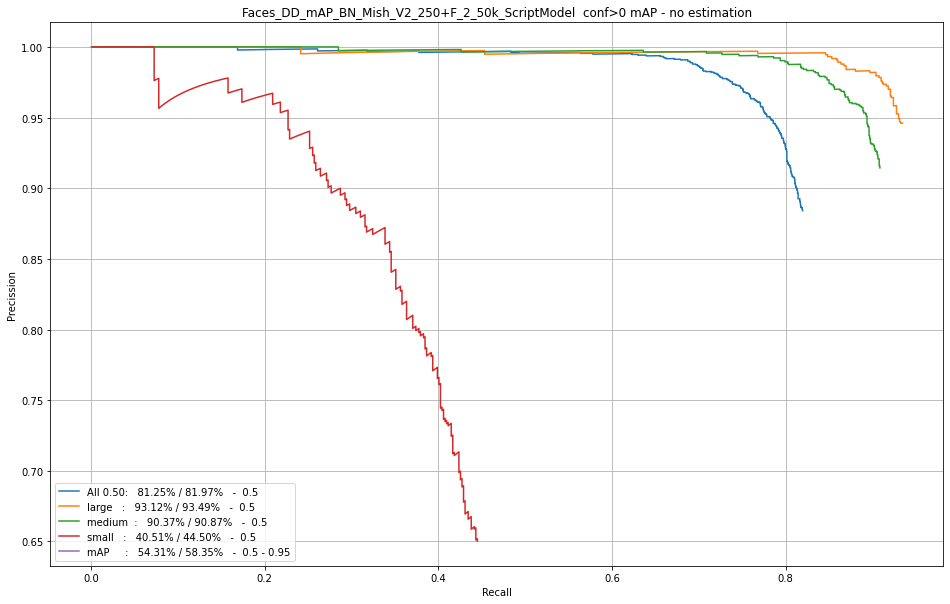

 Wider_Face_mAP_BN_Mish_V2_250+F_2_50k_ ScriptModel  - total time 281.83 s  per img 0.0874 s
All 0.50:   AP: 33.25%   Recall: 33.80%   IoU: 0.5
large   :   AP: 84.67%   Recall: 84.89%   IoU: 0.5
medium  :   AP: 71.15%   Recall: 71.55%   IoU: 0.5
small   :   AP: 14.93%   Recall: 15.92%   IoU: 0.5
mAP     :   AP: 19.60%   Recall: 21.51%   IoU: 0.5 - 0.95


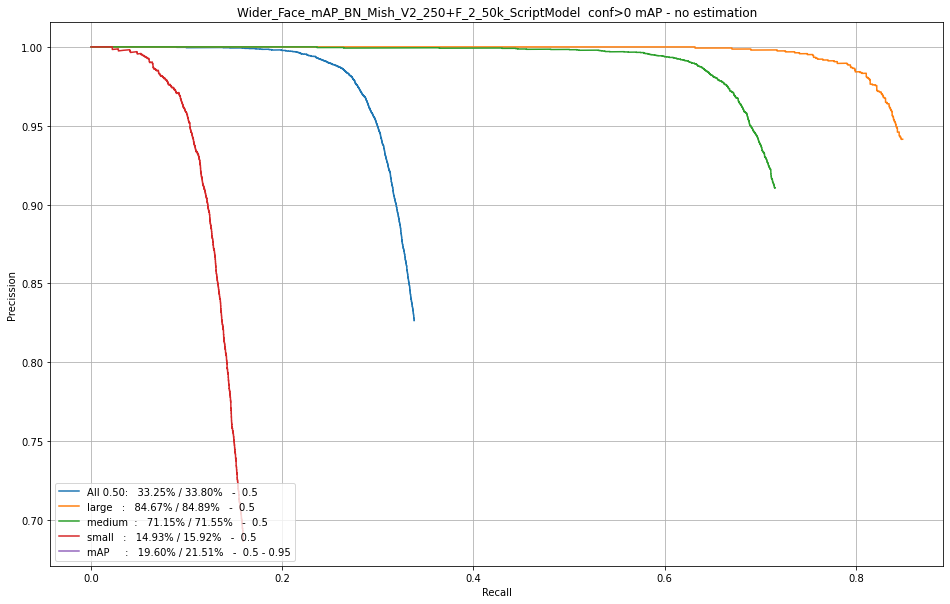

In [40]:
set_choices=['ScriptModel',]
for c in set_choices:
  resF[c]=script_results(Faces_DD,model,'Faces_DD_mAP_BN_Mish_V2_250+F_2_50k_',c,pres=False)
  resW[c]=script_results(val,model,'Wider_Face_mAP_BN_Mish_V2_250+F_2_50k_',c,pres=False)

In [41]:
for c in set_choices:
  res=mAP(resW[c]['gbxs'],resW[c]['dbxs'],data=False)
  Ap=[]
  for i in range(10):
    Ap.append(res[0]['All {:.2f}'.format(0.5+i*0.05)][0])
  print(c,' mAP: ',sum(Ap)/10,'\nset: ', Ap)  #srednie AP dla conf [.5 ... 0.95]

ScriptModel  mAP:  0.19596398841902504 
set:  [0.33249122963533795, 0.32663098941798563, 0.31400190944993833, 0.2947726206932388, 0.2646764639826764, 0.21667408263109084, 0.14341057284866973, 0.058073289893122895, 0.008770692443093316, 0.00013803319509656786]


<br><br>
[7. Eksport modelu](07_00_Eksport_modelu.ipynb)
###[Spis Treści](https://github.com/DarekGit/FACES_DNN/blob/master/notebooks/Praca_Dyplomowa.ipynb)


